<!--Header-->
<div style="background-color: #fff; color: black">
    <div style="padding-bottom: 20px; display: flex; justify-content: space-between; align-items: flex-start;">
        <div style="width: 60%;">
            <h1 style="margin: 16px">TFG - Inteligencia Artificial</h1>
            <p style="margin: 16px; padding-bottom: 0">Junio de 2025</p>
        </div>
        <div style="width: 40%; text-align: right">
            <img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" alt="Logo UOC">
        </div>
    </div>
    <h2 style="text-align: justify; padding: 0 16px">Aplicación de técnicas de IA fiable en la predicción del índice de calidad de vida en personas con tratamiento oncológico mediante aprendizaje automático.</h2>
    <div style="background-color: #000; width: 100%; height: 2px; margin: 24px 0"></div>
    <div style="padding: 20px">
        <h4 style="margin: 0 0; padding: 0 0">Pablo Pimàs Verge</h4>
        <h5 style="margin: 0 0; padding: 0 0">Grado en Ingeniería Informática</h5>
        <h5 style="margin: 0 0 4px; padding: 0 0">Inteligencia Artificial</h5>
        <h4 style="margin: 8px 0 4px; padding: 0 0">Dra. María Moreno de Castro</h4>
        <h4 style="margin: 0 0; padding: 0 0">Dr. Friman Sanchéz</h4>
    </div>
</div>

<!--/Header-->

# Fase 2
#### Segunda Parte
##### - Entrenamiento de modelos
##### - Aplicación del modelo óptimo

# Modelado

El problema planteado es una clasificación multiclase del índice de calidad de vida (QoL) en personas con tratamiento oncológico. En la primera parte se ha realizado el análisis exploratorio de datos y la preparación [1]. En el análisis se han identificado dos tipos de predictores: las variables que informan aspectos de funcionamiento e inciden positivamente en el QoL; y las variables que informan síntomas, producidos por la enfermedad o el tratamiento, e inciden negativamente en el QoL. Por razones prácticas, nombraremos a estos dos tipos variables directas y variables inversas respectivamente. Con respecto a la preparación, se ha reducido la variable calidad de vida QoL a 3 clases para mejorar la clasificación y dotarla de sentido semántico, estas son: 0 (baja), 1 (media) y 2 (alta). Además, del conjunto inicial con 1727 observaciones, se han eliminado 249 filas con valores nulos en todas las columnas y 4 filas con valores nulos en las variables del dominio C23. Por último, también se han eliminado las variables Upset by hair loss y Sexual enjoyment por contener más de un 60% de valores nulos. Por lo tanto, el conjunto resultante contiene 1474 observaciones compuestas por 20 predictores y la variable objetivo.

Este cuaderno corresponde a la segunda parte de la fase 2 del plan de trabajo del TFG. Se aborda el entrenamiento y la aplicación de los modelos previstos al conjunto de datos resultante de la preparación. Estas tareas corresponden a la fase de modelado en el marco de CRISP-DM.


### Objetivos

En el presente cuaderno se realizarán las siguientes acciones: 

- Separar los datos de df_C30_C23 en los conjuntos de: entrenamiento, prueba, validación y calibración
- Entrenar y aplicar los siguientes modelos:

### Índice

1. Entrenamiento y clasificación
    - modelo 1
    - modelo 2
    - modelo 3 
    - modelo 4
2. Selección del modelo óptimo

### Importaciones

In [1]:
# Importaciones de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

# Funciones auxiliares
import aux_functions as afn

In [2]:
# Configuraciones
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
plt.rc('font', size=10)
plt.rcParams["legend.frameon"] = False
sns.set_theme(
    style="white",
    palette="viridis",
    rc={
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False
    }
)
sns.set_style("white", {"axes.grid": False})

### Carga de los datos

In [3]:
# Carga de los datos en un dataframe de Pandas a partir del conjunto generado en la fase previa en formato csv
file_path = "./data/QLQ_C30_C23.csv"
df = pd.read_csv(file_path)
# Filas duplicadas
print('Total de observaciones sin duplicados: ', df.duplicated().count())

Total de observaciones sin duplicados:  1474


In [4]:
# Comprobamos que el conjunto importado contiene las 1474 observaciones sin valores faltantes y las 21 variables de tipo decimal (float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   QoL                            1474 non-null   float64
 1   Physical functioning           1474 non-null   float64
 2   Role functioning               1474 non-null   float64
 3   Emotional functioning          1474 non-null   float64
 4   Cognitive functioning          1474 non-null   float64
 5   Social functioning             1474 non-null   float64
 6   Fatigue                        1474 non-null   float64
 7   Nausea and vomiting            1474 non-null   float64
 8   Pain                           1474 non-null   float64
 9   Dyspnea                        1474 non-null   float64
 10  Insomnia                       1474 non-null   float64
 11  Appetite loss                  1474 non-null   float64
 12  Constipation                   1474 non-null   f

### 1. Creación de los conjuntos de entrenamiento, prueba y calibración

Para la división de los conjuntos de entrenamiento y pruebe aplicaremos una proporción de 75-25 con estratificación para asegurar que las clases de la variable objetivo se distribuyen uniformemente en todos los conjuntos. 


In [5]:
# Extracción de las variables independientes en un dataframe y de la variable dependiente en una serie
X = df.drop('QoL', axis=1)
y = df['QoL']
# División de los datos en entrenamiento y prueba 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.25, stratify=y, random_state=73)
# Division de los datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.25, stratify=y_train_all, random_state=73)

Con el fin de cuantificar la incertidumbre del modelo en la próxima etapa, es necesario reservar un subconjunto de los datos, que se utilizarán para realizar la calibración. Para ello, separamos un 20% del conjunto de prueba, ya que el modelo no debe conocerlos durante el entrenamiento.

In [6]:
# Reserva de los datos para la calibración
X_test, X_cal, y_test, y_cal = train_test_split(X_test_all, y_test_all, test_size=0.20, stratify=y_test_all, random_state=73)

Una vez dispuestos todos los conjuntos necesarios, mediante la función auxiliar viz_split_distributions realizaremos una comprobación de la distribución de las 3 clases en cada uno de ellos. 

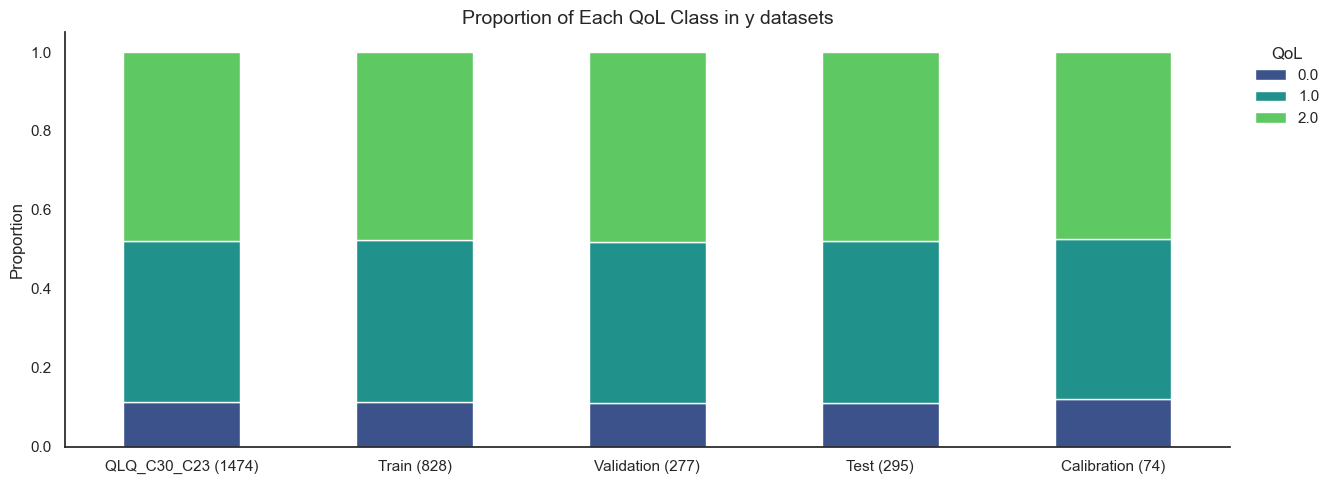

In [7]:
afn.viz_split_distributions([df['QoL'], y_train, y_val, y_test, y_cal], ['QLQ_C30_C23', 'Train', 'Validation', 'Test', 'Calibration'])

Podemos ver que la distribución de la variable objetivo es igual en todos los conjuntos generados. Además, las 1474 observaciones del conjunto original se han separado en: 828 para entrenamiento, 277 para la validación, 295 para las pruebas y 74 para la calibración. Estos valores responden a los porcentajes deseados. Entrenamiento y validación corresponden al 75% de los datos originales, mientras pruebas y calibración al 25% restante.